# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

/Users/danielleadler/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/danielleadler/anaconda3/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [2]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

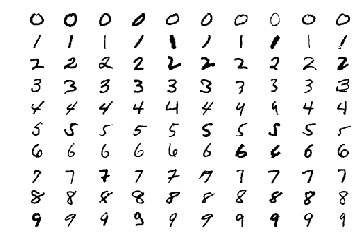

In [3]:
def P1(num_examples=10):

### STUDENT START ###

    # Initializing our subplot so that it starts with printing the first row in our image grid
    adding_rows = 0

    # Incrementing each digit of the 10 digit possibilities
    for digit in range(10):
    
        # Creating a grid to show the matrix representation of each digit
        grid = (mini_train_data[mini_train_labels == digit])
    
        # Incrementing to print 10 images of each digit
        for image in range(num_examples):
        
            adding_rows += 1
        
            # Breaks the graph into rows (10), columns (10)
            # and adds a row each time we go through the for loop (10 times)
            plt.subplot(10, num_examples, adding_rows)
            plt.axis('off')
        
            # Looping through 10 of the examples that are in grid
            # Reshaping to 28 x 28 pixels for proper rendering of the images
            plt.imshow(grid[image].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
def P2(k_values):

### STUDENT START ###

    for kNN in k_values:
    
        # Initialize the model to apply it to each digit in k_values
        # Our k_values correspond to how many k nearest neighbors we are looking at
        model = KNeighborsClassifier(n_neighbors=kNN)

        # Fit the model on the mini training dataset
        model.fit(mini_train_data, mini_train_labels)
    
        # Predict the model on the dev dataset
        dev_predicted_labels = model.predict(dev_data)
    
        # Evaluate the model accuracy on the dev data
        print("k = ", kNN,": ",model.score(dev_data, dev_labels), " model accuracy", sep="")
    
        if kNN == 1:
        
            # Evaluting 1 k nearest neighbors on each of our digits
            print(classification_report(dev_labels, dev_predicted_labels))
        
### STUDENT END ###

k_values = [1, 3, 5, 7, 9]
P2(k_values)

k = 1: 0.888 model accuracy
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

k = 3: 0.878 model accuracy
k = 5: 0.869 model accuracy
k = 7: 0.865 model accuracy
k = 9: 0.863 model accuracy


**ANSWER:** According to the results, we should only look at 1 k Nearest Neighbor to get the highest model accuracy. If we are evaluating more nearest neighbors, we could run into padding, or clear cut lines where the number ends, which could make accuracy more difficult to predict.

The hardest digit to predict at 1 k Nearest Neighbors with regards to precision is digit 3 (digits are labeled as 3's when they are not), although digit 2 has the lowest recall (2's are often predicted as digits other than 2). If we look at the f1-score, taking precision and recall together, digit 9 is the hardest digit to predict at 1 k Nearest Neighbor.

<br>

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

In [5]:
def P3(train_sizes, accuracies):

### STUDENT START ###

    for size in train_sizes:
    
        # Initialize the model to apply it to k Nearest Neighbors 1 as the question states
        model = KNeighborsClassifier(n_neighbors=1)

        # Fit the model on the size of the training data specified above
        model.fit(train_data[:size], train_labels[:size])
    
        # Setting initial time here before prediction
        time_initial = time.time()

        # Predict the model using the dev data
        test_predicted_labels = model.predict(dev_data)
    
        # Setting the final time here after prediction
        time_final = time.time()
    
        # Evaluate the model accuracy on the various training data sizes
        print("training data size ", size, ": ", model.score(dev_data, dev_labels), " model accuracy; ",
              "%.2f" % (time_final - time_initial), " seconds of prediction time", sep="")      
    
        # Creating a list for accuracy variables to use in problem 4
        accuracies.append(model.score(dev_data, dev_labels))

### STUDENT END ###

train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

training data size 100: 0.72 model accuracy; 0.15 seconds of prediction time
training data size 200: 0.786 model accuracy; 0.24 seconds of prediction time
training data size 400: 0.841 model accuracy; 0.49 seconds of prediction time
training data size 800: 0.884 model accuracy; 0.91 seconds of prediction time
training data size 1600: 0.902 model accuracy; 1.84 seconds of prediction time
training data size 3200: 0.926 model accuracy; 3.61 seconds of prediction time
training data size 6400: 0.937 model accuracy; 7.06 seconds of prediction time
training data size 12800: 0.959 model accuracy; 14.64 seconds of prediction time
training data size 25000: 0.97 model accuracy; 28.09 seconds of prediction time


(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

R^2 = 0.4431
Intercept = 0.8432
Coefficient = 0.00000667
Estimated function: y = 0.8432 + 0.00000667x
Training data size 60000: 1.243 model accuracy


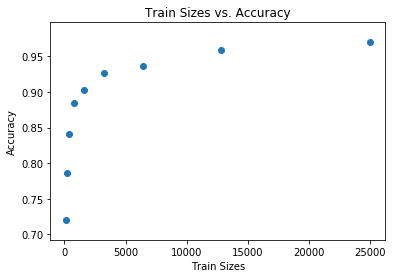

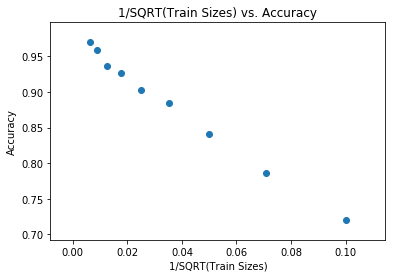

R^2 = 0.9938
Intercept = 0.9756
Coefficient = -2.62109480
Estimated function: y = 0.9756 + 1/sqrt(-2.62109480x)

Accuracy with Training Data Size 6,0000 predicted by Linear Regression: 0.965 model accuracy
Accuracy with Training Data Size 6,0000 predicted by k Nearest Neighbors: 0.977 model accuracy


In [6]:
def P4():

### STUDENT START ###

    # Assigning the input and output data
    Input_X = np.asarray(train_sizes).reshape(-1, 1)
    Output_Y = np.asarray(accuracies)

    # Running the linear regression
    LR = LinearRegression (fit_intercept=True)
    LR.fit(Input_X, Output_Y)

    # Printing metrics related to the linear regression output
    print ('R^2 = %.4f' % (LR.score(Input_X,Output_Y)))
    print ('Intercept = %.4f' % (LR.intercept_))
    print ('Coefficient = %.8f' % (LR.coef_))
    print ('Estimated function: y = %.4f + %.8fx' %(LR.intercept_, LR.coef_[0]))

    # Predicting model accuracy on training data of 60,000 (i.e. all of the training data)
    print ("Training data size 60000: ", '%.3f' % (LR.predict(60000)), 
           " model accuracy", sep="")

    # Creating a scatter plot to evaluate the issue with using regression,
    # which appears to be the X and Y axis are not linear
    plt.scatter(Input_X, Output_Y)
    plt.title("Train Sizes vs. Accuracy")
    plt.xlabel("Train Sizes")
    plt.ylabel("Accuracy")
    plt.show()

    # Transformed the data training size data for a better accuracy measure
    # and a linear relationship between the input and output variables
    Input_X_SQRT = np.asarray(1 / np.sqrt(train_sizes)).reshape(-1,1)
    Output_Y = np.asarray(accuracies)

    # Creating a scatter plot to show that after transformation the relationship is far more linear
    plt.scatter(Input_X_SQRT, Output_Y)
    plt.title("1/SQRT(Train Sizes) vs. Accuracy")
    plt.xlabel("1/SQRT(Train Sizes)")
    plt.ylabel("Accuracy")
    plt.show()

    # Running the linear regression with the training size data as a transformation
    LR = LinearRegression (fit_intercept=True)
    LR.fit(Input_X_SQRT, Output_Y)

    # Printing metrics related to the transformed linear regression output
    print ('R^2 = %.4f' % (LR.score(Input_X_SQRT,Output_Y)))
    print ('Intercept = %.4f' % (LR.intercept_))
    print ('Coefficient = %.8f' % (LR.coef_))
    print ('Estimated function: y = %.4f + 1/sqrt(%.8fx)' %(LR.intercept_, LR.coef_[0]))
    print ("\nAccuracy with Training Data Size 6,0000 predicted by Linear Regression: ", '%.3f' % (LR.predict(1/np.sqrt(60000))), 
           " model accuracy", sep="")

    # Evaluating the actual training data size accuracy with a size of 60,000
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(train_data[:60000], train_labels[:60000])
    test_predicted_labels = model.predict(dev_data)
    print("Accuracy with Training Data Size 6,0000 predicted by k Nearest Neighbors: ",model.score(dev_data, dev_labels),
          " model accuracy", sep="")

### STUDENT END ###

P4()

**ANSWER:** The original prediction for the accuracy on a training size of 60,000 was 1.243, which equates to an accuracy of over 100%. An accuracy of this value is not possible. I then looked at the relationship between the training sizes and accuracy, and saw that the relationship was logarithmic. As the relationship at this point was not linear, a linear regression could not be used. 

I transformed the data using a 1 over the square root of the training size transformation to produce a linear relationship between the training size and accuracy datasets. The accuracy was then 0.965 from the linear regression, while the accuracy with k nearest neighbors is 0.977, which is within a ~1% of the linear regression predicted accuracy.

<br>

(5) Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]


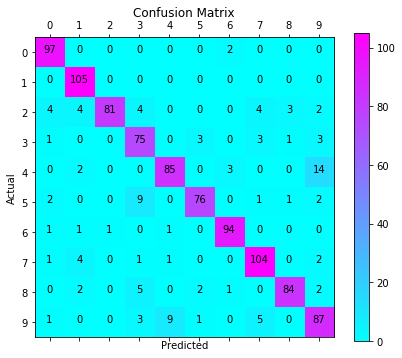

Most confused pair of digits (predicted, actual): [(9.0, 4.0)]


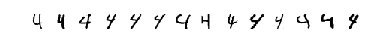

In [7]:
def P5():

### STUDENT START ###

    # First, train the data using the mini train data, fit the model, and then predict using the dev data
    model = KNeighborsClassifier(n_neighbors=1)
    model.fit(mini_train_data, mini_train_labels)
    dev_predicted_labels = model.predict(dev_data)

    # Print out a confusion matrix using the predictions
    cm = confusion_matrix(dev_labels, dev_predicted_labels)
    print(cm)

    # Print out a confusion matrix heat map for better visual representation
    fig = plt.figure(figsize=(6,6))
    ax = fig.add_subplot(111)
    cax = ax.matshow(cm, cmap=plt.cm.cool)
    plt.title('Confusion Matrix')
    plt.colorbar(cax,fraction=0.046, pad=0.06)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.xticks(np.arange(0, 10, step=1))
    plt.yticks(np.arange(0, 10, step=1))
    for a in range(10):
        for b in range(10):
            plt.text(b,a,str(cm[a][b]), horizontalalignment='center')
    plt.show()


    # Storing all of the errors between prediction and actual in a dictionary so that I can
    # figuring out the most confused digits within my confusion matrix
    errors = {}

    for i in range(0, len(dev_data)):
        if dev_predicted_labels[i] != dev_labels[i]:
        
            # Putting the pairs in a tuple together where the predicted label does not equal the actual label
            pair = (dev_predicted_labels[i], dev_labels[i])
        
            # If the pair is not yet in our error dictionary, count it one time (add it to the dictionary)
            if pair not in errors.keys():
                errors[pair] = 1
        
            # If the pair is already in our dictionary, add one
            else:
                errors[pair] += 1

    # Sorting to see the most confused pair of digits
    error_sort = sorted(errors, key=errors.get, reverse=True)[:1]
    print("Most confused pair of digits (predicted, actual):", error_sort)

    
    # Creating a dataset of the most confused pairs with the proper index so that I can print the images
    # associated with this confused pairing
    pred_X_act_X = np.where((dev_predicted_labels == error_sort[0][0]) & (dev_labels == error_sort[0][1]))

    # Initializing our subplot so that it starts with printing the first column in our image grid        
    adding_col = 0

    for data_num in (pred_X_act_X[0]):
            adding_col += 1
        
            # Breaks the graph into rows, columns
            # and adds column each time we go through the for loop (for as many images that exist)
            plt.subplot(1, len(pred_X_act_X[0]), adding_col)
            plt.axis('off')
        
            # Reshaping the image to 28 x 28 pixels
            plt.imshow(dev_data[data_num].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

model accuracy when preprocessing the training data but not the dev data: 0.908
model accuracy when preprocessing the dev data but not the training data: 0.871
model accuracy when preprocessing both training and dev data: 0.902


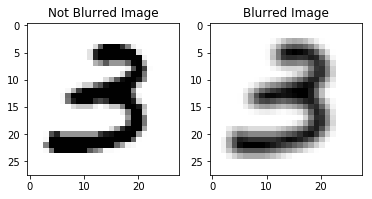

In [9]:
def P6():
    
### STUDENT START ###

    def blur (dataset):
        """Pre-processing function to blur each image within a dataset"""
        
        mini_6_blur_data = dataset.copy()
    
        # Initializing each image to blur as zeros
        blur_image = np.zeros((28,28))
    
        # I am indexing to reshape each image and then replace it back within the dataset
        for image in range(len(mini_6_blur_data)):
            x = dataset[image].reshape(28,28)
        
            # Now I will loop through each row and then each column to go through pixel by pixel
            for row in range(28):
                for col in range(28):
                
                    # Slicing top to bottom and then left to right
                    # If row - 1 does not exist, I am starting at the top of the image
                    # I am isolating each pixel for us to look at and subsequently blur
                    # We have to have row + 2 and col + 2 as our slicing is non-inclusive
                    nn = x[max(0,row-1):row+2, max(0,col-1):col+2]
                        
                    # Summing the values in neighboring pixels over the number of neighboring pixels
                    # to get the proper weight; the average of the pixel values
                    # Acquiring the proper value for the pixel and then putting it back into the image
                    blur_image[row][col] = np.sum(nn) / float(nn.size)
                
            # Now putting the image back into the dataset into the same shape
            # I am using mini_6_blur_data[1] as an example to get the proper data shape
            mini_6_blur_data[image] = blur_image.reshape(dataset.shape[1])
    
        return mini_6_blur_data

    # Printing examples of blurred images from the mini training data
    x = blur(mini_train_data)

    plt.subplot(1,2,1)
    plt.title("Not Blurred Image")
    plt.imshow(mini_train_data[100].reshape(28,28), cmap=plt.cm.gray_r)
    plt.subplot(1,2,2)
    plt.title("Blurred Image")
    plt.imshow(x[100].reshape(28,28), cmap=plt.cm.gray_r)

    # Using k Nearest Neighbors to find accuracy as we are blurring with nearest neighbors above
    def KNN (train_data, train_labels, predict_data, predict_labels):
        """Using k Nearest Neighbors to evaluate accuracy of the blurred images"""
    
        # Choosing to only use 1 k Nearest Neighbor
        model = KNeighborsClassifier(n_neighbors=1)
        model.fit(train_data, train_labels)
        model.predict(predict_data)  
        return(model.score(predict_data, predict_labels))
    
    
    # Using the blur function to preprocess the datasets
    preprocess_train = blur(mini_train_data)
    preprocess_dev = blur(dev_data)

    print("model accuracy when preprocessing the training data but not the dev data:", 
          KNN(preprocess_train, mini_train_labels, dev_data, dev_labels))

    print("model accuracy when preprocessing the dev data but not the training data:", 
          KNN(mini_train_data, mini_train_labels, preprocess_dev, dev_labels))

    print("model accuracy when preprocessing both training and dev data:", 
          KNN(preprocess_train, mini_train_labels, preprocess_dev, dev_labels))

### STUDENT END ###

P6()

**ANSWER:** The difference in accuracy is very small between the three different models I ran as long as I processed the training data, although it is best when the training data is preprocessed and the dev data is not. This makes sense as the training data is blurred so that the it can be more generalized when trying to predict the dev data. The dev data does not also need to be more generalized.

With regards to weighting within the Gaussian function, I weighted according to the neighboring pixel values (adding them all together and then dividing by the number of pixels), which produced the highest accuracy.

<br>

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

In [ ]:
def P7():

### STUDENT START ###

    # Creating a copy of the dataset for easier parsing mapping to pixel values 0 or 1
    mini_X1 = mini_train_data.copy()
    mini_Y1 = mini_train_labels.copy()

    # Fitting the mini training data and then scoring the dev data
    # Passing a defined threshold into the binarize parameter
    BernNB = BernoulliNB(binarize=((np.max(mini_X1) - np.min(mini_Y1)) / 2))
    BernNB.fit(mini_X1, mini_Y1)
    print('Accuracy on the Dev Data for BernoulliNB Pixel Values:', BernNB.score(dev_data, dev_labels))
    
    # Plotting the binarized data to understand my output in histogram of the BernoulliNB
    mini_X1[np.where(mini_train_data < 0.5)] = 0
    mini_X1[np.where(mini_train_data > 0.5)] = 1
    
    plt.hist(mini_X1[100])
    plt.xlabel("Pixel Thresholds")
    plt.ylabel("Num of Pixels")
    plt.title('Image 100 Histogram of BernoulliNB Pixel Values')
    plt.show()    
    

    # Creating a copy of the dataset for easier parsing for mapping to pixel values 0, 1 or 2
    mini_X2 = mini_train_data.copy()
    mini_Y2 = mini_train_labels.copy()

    # Parsing the data into new variables
    # From playing with the thresholds and the histogram below, most pixels are at the ends of the spectrum
    # as we know that all images are padded with zeros and most of the digit's writing will have a higher pixel value
    mini_X2[np.where(mini_train_data < .05)] = 0
    mini_X2[np.where((mini_train_data >= .05) & (mini_train_data < .95))] = 1
    mini_X2[np.where(mini_train_data >= .95)] = 2

    # Fitting the mini training data and then scoring the dev data
    MultiNB = MultinomialNB()
    MultiNB.fit(mini_X2, mini_Y2)
    print('\nAccuracy on the Dev Data for MultinomialNB Pixel Values:', MultiNB.score(dev_data, dev_labels))

    # Plotting to understand my output in histogram of the MultinomialNB
    plt.hist(mini_X2[100])
    plt.xlabel("Pixel Thresholds")
    plt.ylabel("Num of Pixels")
    plt.title('Image 100 Histogram of MultinomialNB Pixel Values')
    plt.show()
    
    # Plotting example images of the MultinomialNB and BernoulliNB transformations to show the differences
    plt.subplot(1,2,1)
    plt.axis('off')
    plt.title("BernoulliNB Pixel Values")
    plt.imshow(mini_X1[100].reshape(28,28), cmap=plt.cm.gray_r)
    
    plt.subplot(1,2,2)
    plt.axis('off')
    plt.title("MultinomialNB Pixel Values")
    plt.imshow(mini_X2[100].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P7()

**ANSWER:** The MultinomialNB model does not improve the results as the accuracy here is 0.795 compared with a BernoulliNB model accuracy of 0.815. In the case of the MultinomialNB model where we are splitting the data into white, black, and grey, the grey does not seem to add anything to the prediction. Much of the data is either black (a high pixel value) or white (a low pixel value), while very little bit of the data is grey. Therefore, the prediction is weaker as we are essentially adding noise to a fairly binarized image.

<br>

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

In [10]:
def P8(alphas):

### STUDENT START ###

    BernNB = BernoulliNB(binarize=0)
    GS_CV = GridSearchCV(BernNB, param_grid=alphas)
    GS_CV.fit(mini_train_data, mini_train_labels)
    return("Grid Scores:", GS_CV.grid_scores_, "Best Alpha Parameter:", GS_CV.best_params_)

### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
P8(alphas)

/Users/danielleadler/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/danielleadler/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/danielleadler/anaconda3/lib/python3.6/site-packages/sklearn/naive_bayes.py:472: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


('Grid Scores:',
 [mean: 0.80300, std: 0.03072, params: {'alpha': 0.0},
  mean: 0.82000, std: 0.02208, params: {'alpha': 0.0001},
  mean: 0.82000, std: 0.02305, params: {'alpha': 0.001},
  mean: 0.82000, std: 0.02607, params: {'alpha': 0.01},
  mean: 0.82100, std: 0.02454, params: {'alpha': 0.1},
  mean: 0.81900, std: 0.02147, params: {'alpha': 0.5},
  mean: 0.81200, std: 0.01814, params: {'alpha': 1.0},
  mean: 0.81000, std: 0.01767, params: {'alpha': 2.0},
  mean: 0.77500, std: 0.01719, params: {'alpha': 10.0}],
 'Best Alpha Parameter:',
 {'alpha': 0.1})

**ANSWER:** The best value for alpha is 0.1, although all of the alphas between 0.0001 and 0.1 are very close. The alpha at 0 contains no smoothing at all. Therefore, we get an erorr in our dataset, and our prediction is 2 percentage points weaker than when we even have just a small smoothing parameter. I would have expected the best alpha to be a bit smaller, such as 0.0001 as our dataset is so large. However, our mini training dataset is not quite as large, and therefore it may require a slightly larger alpha.

The smoothing parameters at 0.5 and above are simply too large and unnecessary for the dataset, which is already large. Therefore, they are essentially over-smoothing the dataset, leading to an incrementally lower accuracy with the higher values of alpha.

<br>

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [11]:
def P9():

### STUDENT END ###

    # Training a model using the GuassianNB function with the mini data and then scoring on the dev data
    GaussNB = GaussianNB()
    GaussNB.fit(mini_train_data, mini_train_labels)
    print('Accuracy on the Dev Data for GuassianNB_Initial:', GaussNB.score(dev_data, dev_labels))

    # theta_ is the mean and sigma_ is the variance
    # I am now examining key statistics of the sigmas and thetas
    print("\nExamining GaussNB.theta_:", "\nmean:", '%.3f' % np.mean(GaussNB.theta_), "\nstandard deviation:",
         '%.3f' % np.std(GaussNB.theta_), "\nmax:", '%.3f' % np.max(GaussNB.theta_), "\nmin:", 
          '%.3f' % np.min(GaussNB.theta_))
    
    print("\nExamining GaussNB.sigma_:", "\nmean:", '%.3f' % np.mean(GaussNB.sigma_), "\nstandard deviation:",
         '%.3f' % np.std(GaussNB.sigma_), "\nmax:", '%.3f' % np.max(GaussNB.sigma_), "\nmin:", 
          '%.3f' % np.min(GaussNB.sigma_))

    # Printing to get an extra line in the output
    print("")
    
    # I have 10 rows and 784 pixels within each image, and my goal is to change the sigmas for all dev_data
    # to try to improve our prediction as the sigmas and thetas are very close to 0
    # I am increasing the sigmas to improve prediction accuracy by allowing a higher variance across pixels
    for x in np.linspace(0.1,1,4):
        GaussNB.sigma_ = np.full((10, 784),x)
        
        # I do not have to fit with our train data again as the sigma is an artifact of the train_data
        # that we pass in, and I have just passed in a new sigma
        print("Accuracy on the Dev Data for GuassianNB_Final: ", '%.3f' %
              GaussNB.score(dev_data, dev_labels), " at sigma: ", '%.3f' % x,  sep="")

    # Printing to get an extra line in the output
    print("")
    
    # Decided to evaluate very high sigmas to see a change in trend in our predictions
    # However, if I increase the sigmas too much, the prediction levels go down as well
    for x in np.linspace(1,10,6):
        GaussNB.sigma_ = np.full((10, 784),x)
    
        print("Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: ", '%.3f' %
              GaussNB.score(dev_data, dev_labels), " at sigma: ", x,  sep="")

### STUDENT END ###

P9()

Accuracy on the Dev Data for GuassianNB_Initial: 0.621

Examining GaussNB.theta_: 
mean: 0.131 
standard deviation: 0.205 
max: 0.944 
min: 0.000

Examining GaussNB.sigma_: 
mean: 0.053 
standard deviation: 0.070 
max: 0.216 
min: 0.000

Accuracy on the Dev Data for GuassianNB_Final: 0.802 at sigma: 0.100
Accuracy on the Dev Data for GuassianNB_Final: 0.802 at sigma: 0.400
Accuracy on the Dev Data for GuassianNB_Final: 0.801 at sigma: 0.700
Accuracy on the Dev Data for GuassianNB_Final: 0.802 at sigma: 1.000

Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.802 at sigma: 1.0
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.799 at sigma: 2.8
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.801 at sigma: 4.6
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.792 at sigma: 6.4
Accuracy on the Dev Data for GuassianNB_Evaluating_Higher_Sigmas: 0.784 at sigma: 8.2
Accuracy on the Dev Data for GuassianNB_Evaluating_High

**ANSWER:** In order to get a better prediction, I changed the value of the sigmas (the variance) within the GuassianNB for the prediction on the dev data as the GaussianNB function assumes a normal distribution. The variance began very small, with an average of 0.053, which allowed for very little variation when fitting the mini train dataset to predict the dev data.

When I increased the size of the variance to between 0.1 - 1, I widened the distribution and allowed for more room in variation when predicting the dev data. Therefore, I was able to generalize the model further for a higher accuracy. When I increased the sigma too much (1.0), I saw the variance increase too much, allowing for too much room in predictions, which resulted in a lower accuracy.

The accuracy of 0.802 is not as good as the BernoulliNB model, but it is very close.

<br>

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

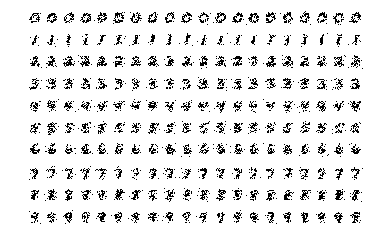

In [12]:
def P10(num_examples):
    
### STUDENT START ###

    # Fitting the mini training data and then scoring the dev data
    # A higher threshold or taking the median produced a worse result
    BernNB = BernoulliNB(binarize=.1)
    model_fit = BernNB.fit(mini_train_data, mini_train_labels)

    # For each feature we have a log probability associated and now we are converting back to a probability
    # The probabilities here are the probability that a pixel exists (probability of it being 1)
    pixel_probs = np.exp(model_fit.feature_log_prob_)

    # Initializing our subplot so that it starts with printing the first row in our image grid
    adding_rows = 0

    # Incrementing each digit of the 10 digit possibilities
    for digit in range(10):
    
        # (np.random.rand(num_examples,28*28)) are random digits between 0 and 1 in the same shape as our data grid
        # We only want to keep the images of digits that have higher probabilities than the randomly generated ones
        # The grid equation is looking at each pixel and then creating images where there are higher probabilities
        grid = pixel_probs[digit] > np.random.rand(num_examples,28*28)
    
        # Incrementing to print 20 images within each digit
        for image in range(num_examples):
        
            adding_rows += 1
        
            # Breaks the graph into rows (10), columns (num_examples)
            # and adds row each time we go through the for loop (10 times)
            plt.subplot(10, num_examples, adding_rows)
            plt.axis('off')
        
            # Looping through 10 of the examples that are in grid
            # Reshaping to print images at 28 x 28 pixels
            # Printing the randomly generated images
            plt.imshow(grid[image].reshape(28,28), cmap=plt.cm.gray_r)

### STUDENT END ###

P10(20)

**ANSWER:** In this case, the generated digits look worse and more scattered than the actual training digits, although the digits can loosely be made out. This is because the training digits was binarized (on a threshold of 0.1). The higher the threshold, the more scattered the digits were and the harder they were to make out. 

Then a dataset was reproduced based off of the probability of the pixel being a higher probability than the random number generator. If the shape of the number was unclear, or had more variability originally in pixel values, the number is now harder to make out. The data is hard to make out as Naive Bayes assumes independence between all features (pixels), which is not always the case in these digits.

<br>

(11) Remember that a strongly calibrated classifier is rougly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

In [13]:
def P11(buckets, correct, total):
    
### STUDENT START ###

    # Creating a copy of the dataset for easier parsing
    mini_12_train = mini_train_data.copy()
    dev_12_data = dev_data.copy()

    # Binarizing the training and dev data for use in the BernoulliNB model
    mini_12_train[np.where(mini_train_data < .5)] = 0
    mini_12_train[np.where(mini_train_data > .5)] = 1

    # Tried not binarizing the dev data, but binarizing gave a better prediction
    dev_12_data[np.where(dev_data < .5)] = 0
    dev_12_data[np.where(dev_data > .5)] = 1

    # Fitting the mini training data and then scoring the dev data
    # We don't have to pass through anything binarized as the data is already binarized above
    # Alpha value used for smoothing was the best parameter found in question 8 for proper smoothing
    BernNB = BernoulliNB(alpha = 0.1)
    BernNB.fit(mini_12_train, mini_train_labels)


    # We will now iterate through all of the predicted data to bucket appropriately
    # and count the number of correct and total guesses
    for i in range(0,len(dev_12_data)):
    
        # The 'predict_proba' function shows the probability of the predicted development
        # data label being any of the digits from 0 - 9. We are taking the max posterior
        # as this will be the predicted development data label. In this sense, the max
        # posterior is the probability of the correctly predicted digit given the digit
        max_posterior = max(BernNB.predict_proba(dev_12_data)[i])
    
        # We will now bucket the data appropriately to better evaluate the prediction
        # of the development data label
        bucketed_data = next(buckets.index(bucket_num) for bucket_num in buckets if max_posterior <= bucket_num)
    
        # This is the total bucketed data
        total[bucketed_data] += 1
    
        # This is the correctly bucketed data out of the total data
        if BernNB.predict_proba(dev_12_data)[i].argmax(axis=0) == dev_labels[i]:
            correct[bucketed_data] +=1
    
                
### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print ('p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy))

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  35    accuracy = 0.314
p(pred) <= 0.9990000000000    total =  95    accuracy = 0.442
p(pred) <= 0.9999900000000    total =  75    accuracy = 0.653
p(pred) <= 0.9999999000000    total =  63    accuracy = 0.714
p(pred) <= 0.9999999990000    total =  63    accuracy = 0.810
p(pred) <= 0.9999999999900    total =  92    accuracy = 0.804
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.867
p(pred) <= 1.0000000000000    total = 502    accuracy = 0.960


**ANSWER:** The calibration for the Naive Bayes model seems to be weakly calibrated. When the model was more confident about the prediction, it had a higher chance of being correct, showing that the model is not poorly caliberated. For instance, when the posterior prediction was greater than 0.9999999999999, the model had a 96.0% chance of being accurate.

This beig said, when the posterior probability of the predicted class was 0.9, the accuracy was roughly only 31.4%, showing that the Naive Bayes model is not a strongly calibrated classifer either by the definition above. We would expect the accuracy on the full training set to improve, given the increased number of examples of data that could be used to fit the model. BernoulliNB is likely not strongly caliberated given that every pixel is assumed to be independent of the ones around it and we have reduced our pixel values to 0 or 1.

<br>

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

In [ ]:
#def P12():

### STUDENT START ###



### STUDENT END ###

#P12()